## Problem Statement

An education company sells online courses to industry professionals. On any given day, many professionals who are interested in the courses land on their website and browse for courses. 

The company markets its courses on several websites and search engines like Google. Once these people land on the website, they might browse the courses or fill up a form for the course or watch some videos. When these people fill up a form providing their email address or phone number, they are classified to be a lead. Moreover, the company also gets leads through past referrals. Once these leads are acquired, employees from the sales team start making calls, writing emails, etc. Through this process, some of the leads get converted while most do not. The typical lead conversion rate at X education is around 30%. 

There are a lot of leads generated in the initial stage (top) but only a few of them come out as paying customers from the bottom. In the middle stage, you need to nurture the potential leads well (i.e. educating the leads about the product, constantly communicating etc. ) in order to get a higher lead conversion.

The company requires you to build a model wherein you need to assign a lead score to each of the leads such that the customers with higher lead score have a higher conversion chance and the customers with lower lead score have a lower conversion chance. The CEO, in particular, has given a ballpark of the target lead conversion rate to be around 80%.

### Goal

1. Build a logistic regression model to assign a lead score between 0 and 100 to each of the leads which can be used by the company to target potential leads. A higher score would mean that the lead is hot, i.e. is most likely to convert whereas a lower score would mean that the lead is cold and will mostly not get converted.

2.  Model should be able to adjust to if the company's requirement changes in the future. 

###  Importing libraries

In [1]:
#Suppressing Warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
#Importing the useful libraries.
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
#For viewing required rows & columns
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns',500)
pd.set_option('display.width', 1000)
pd.set_option('display.expand_frame_repr', False)

### Step 1: Data Sourcing 

In [4]:
#Reading the dataset
leads_df = pd.read_csv("Leads.csv")
leads_df.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,How did you hear about X Education,What is your current occupation,What matters most to you in choosing a course,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Tags,Lead Quality,Update me on Supply Chain Content,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,Page Visited on Website,NaN,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Interested in other courses,Low in Relevance,No,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,Email Opened,India,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,NaN,No,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,Email Opened,India,Business Administration,Select,Student,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,Unreachable,India,Media and Advertising,Word Of Mouth,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,Not Sure,No,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,Converted to Lead,India,Select,Other,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


In [5]:
#Checking the dimensions
leads_df.shape

(9240, 37)

In [6]:
#Checking the column wise information 
leads_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

In [7]:
#Checking summary for the numeric columns 
leads_df.describe()

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Asymmetrique Activity Score,Asymmetrique Profile Score
count,9240.000000,9240.000000,9103.000000,9240.000000,9103.000000,5022.000000,5022.000000
mean,617188.435606,0.385390,3.445238,487.698268,2.362820,14.306252,16.344883
std,23405.995698,0.486714,4.854853,548.021466,2.161418,1.386694,1.811395
min,579533.000000,0.000000,0.000000,0.000000,0.000000,7.000000,11.000000
25%,596484.500000,0.000000,1.000000,12.000000,1.000000,14.000000,15.000000
50%,615479.000000,0.000000,3.000000,248.000000,2.000000,14.000000,16.000000
75%,637387.250000,1.000000,5.000000,936.000000,3.000000,15.000000,18.000000
max,660737.000000,1.000000,251.000000,2272.000000,55.000000,18.000000,20.000000


### Step 2: Data Cleaning

In [8]:
#Checking for any duplicate values in the dataset
leads_df[leads_df.duplicated(keep=False)]

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,How did you hear about X Education,What is your current occupation,What matters most to you in choosing a course,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Tags,Lead Quality,Update me on Supply Chain Content,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity


##### There are no duplicate values.

In [9]:
#Checking columns with unique values since it won't affect our analysis
leads_df.nunique()

Prospect ID                                      9240
Lead Number                                      9240
Lead Origin                                         5
Lead Source                                        21
Do Not Email                                        2
Do Not Call                                         2
Converted                                           2
TotalVisits                                        41
Total Time Spent on Website                      1731
Page Views Per Visit                              114
Last Activity                                      17
Country                                            38
Specialization                                     19
How did you hear about X Education                 10
What is your current occupation                     6
What matters most to you in choosing a course       3
Search                                              2
Magazine                                            1
Newspaper Article           

In [10]:
#Dropping unique valued columns
leads_df1= leads_df.drop(['Magazine','Receive More Updates About Our Courses','Update me on Supply Chain Content','Get updates on DM Content','I agree to pay the amount through cheque'],axis=1)
leads_df1.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,How did you hear about X Education,What is your current occupation,What matters most to you in choosing a course,Search,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Tags,Lead Quality,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,Page Visited on Website,NaN,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,Interested in other courses,Low in Relevance,Select,Select,02.Medium,02.Medium,15.0,15.0,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,Email Opened,India,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,Ringing,NaN,Select,Select,02.Medium,02.Medium,15.0,15.0,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,Email Opened,India,Business Administration,Select,Student,Better Career Prospects,No,No,No,No,No,No,Will revert after reading the email,Might be,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,Unreachable,India,Media and Advertising,Word Of Mouth,Unemployed,Better Career Prospects,No,No,No,No,No,No,Ringing,Not Sure,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,Converted to Lead,India,Select,Other,Unemployed,Better Career Prospects,No,No,No,No,No,No,Will revert after reading the email,Might be,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,Modified


In [11]:
leads_df1.shape

(9240, 32)

#### Missing Values Treatment

In [12]:
#Checking total null values in dataframe
print('\nLeads null values: ',leads_df.isnull().sum().sum())


Leads null values:  41039


In [13]:
#Checking missing values in dataframe
a = round(leads_df.isnull().sum()/len(leads_df),2)
a.sort_values(ascending=False)

Lead Quality                                     0.52
Asymmetrique Profile Score                       0.46
Asymmetrique Activity Score                      0.46
Asymmetrique Profile Index                       0.46
Asymmetrique Activity Index                      0.46
Tags                                             0.36
What is your current occupation                  0.29
What matters most to you in choosing a course    0.29
Lead Profile                                     0.29
Country                                          0.27
How did you hear about X Education               0.24
Specialization                                   0.16
City                                             0.15
TotalVisits                                      0.01
Page Views Per Visit                             0.01
Last Activity                                    0.01
Lead Source                                      0.00
Do Not Email                                     0.00
Do Not Call                 

In [14]:
leads_df1['Tags'].value_counts(dropna=False)

NaN                                                  3353
Will revert after reading the email                  2072
Ringing                                              1203
Interested in other courses                           513
Already a student                                     465
Closed by Horizzon                                    358
switched off                                          240
Busy                                                  186
Lost to EINS                                          175
Not doing further education                           145
Interested  in full time MBA                          117
Graduation in progress                                111
invalid number                                         83
Diploma holder (Not Eligible)                          63
wrong number given                                     47
opp hangup                                             33
number not provided                                    27
in touch with 

In [15]:
leads_df1['What is your current occupation'].value_counts(dropna=False)

Unemployed              5600
NaN                     2690
Working Professional     706
Student                  210
Other                     16
Housewife                 10
Businessman                8
Name: What is your current occupation, dtype: int64

In [16]:
leads_df1['What matters most to you in choosing a course'].value_counts(dropna=False)

Better Career Prospects      6528
NaN                          2709
Flexibility & Convenience       2
Other                           1
Name: What matters most to you in choosing a course, dtype: int64

In [17]:
leads_df1['Lead Profile'].value_counts(dropna=False)

Select                         4146
NaN                            2709
Potential Lead                 1613
Other Leads                     487
Student of SomeSchool           241
Lateral Student                  24
Dual Specialization Student      20
Name: Lead Profile, dtype: int64

In [18]:
leads_df1['Country'].value_counts(dropna=False)

India                   6492
NaN                     2461
United States             69
United Arab Emirates      53
Singapore                 24
Saudi Arabia              21
United Kingdom            15
Australia                 13
Qatar                     10
Bahrain                    7
Hong Kong                  7
France                     6
Oman                       6
unknown                    5
South Africa               4
Nigeria                    4
Canada                     4
Kuwait                     4
Germany                    4
Sweden                     3
Netherlands                2
Belgium                    2
Ghana                      2
Asia/Pacific Region        2
Bangladesh                 2
China                      2
Italy                      2
Philippines                2
Uganda                     2
Malaysia                   1
Switzerland                1
Russia                     1
Liberia                    1
Tanzania                   1
Indonesia     

In [19]:
leads_df1['How did you hear about X Education'].value_counts(dropna=False)

Select                   5043
NaN                      2207
Online Search             808
Word Of Mouth             348
Student of SomeSchool     310
Other                     186
Multiple Sources          152
Advertisements             70
Social Media               67
Email                      26
SMS                        23
Name: How did you hear about X Education, dtype: int64

In [20]:
leads_df1['Specialization'].value_counts(dropna=False)

Select                               1942
NaN                                  1438
Finance Management                    976
Human Resource Management             848
Marketing Management                  838
Operations Management                 503
Business Administration               403
IT Projects Management                366
Supply Chain Management               349
Banking, Investment And Insurance     338
Travel and Tourism                    203
Media and Advertising                 203
International Business                178
Healthcare Management                 159
Hospitality Management                114
E-COMMERCE                            112
Retail Management                     100
Rural and Agribusiness                 73
E-Business                             57
Services Excellence                    40
Name: Specialization, dtype: int64

In [21]:
leads_df1['City'].value_counts(dropna=False)

Mumbai                         3222
Select                         2249
NaN                            1420
Thane & Outskirts               752
Other Cities                    686
Other Cities of Maharashtra     457
Other Metro Cities              380
Tier II Cities                   74
Name: City, dtype: int64

Converting 'Select' values to 'NaN' for the following columns:
1. Specialization
2. How did you hear about X Education
3. Lead Profile
4. City

In [22]:
#Converting 'Select' values to NaN 

leads_df1['Specialization'] = leads_df1['Specialization'].replace('Select', np.nan)
leads_df1['How did you hear about X Education'] = leads_df1['How did you hear about X Education'].replace('Select', np.nan)
leads_df1['Lead Profile'] = leads_df1['Lead Profile'].replace('Select', np.nan)
leads_df1['City'] = leads_df1['City'].replace('Select', np.nan)

In [23]:
leads_df1.shape

(9240, 32)

In [24]:
#Checking missing values in dataframe
b = round(leads_df1.isnull().sum()/len(leads_df1),2)
b.sort_values(ascending=False)

How did you hear about X Education               0.78
Lead Profile                                     0.74
Lead Quality                                     0.52
Asymmetrique Profile Score                       0.46
Asymmetrique Activity Score                      0.46
Asymmetrique Profile Index                       0.46
Asymmetrique Activity Index                      0.46
City                                             0.40
Specialization                                   0.37
Tags                                             0.36
What matters most to you in choosing a course    0.29
What is your current occupation                  0.29
Country                                          0.27
TotalVisits                                      0.01
Last Activity                                    0.01
Page Views Per Visit                             0.01
Converted                                        0.00
Do Not Call                                      0.00
Do Not Email                

##### We are dropping the columns that have more than 35% null values
1. How did you hear about X Education
2. Lead Profile
3. Lead Quality
4. Asymmetrique Profile Score
5. Asymmetrique Activity Score
6. Asymmetrique Profile Index
7. Asymmetrique Activity Index
8. City
9. Specialization
10. Tags

In [25]:
#Dropping cols with more than 35% missing values
leads_df1 = leads_df1.drop(['How did you hear about X Education','Lead Profile',
                            'Lead Quality','Asymmetrique Profile Score',
                            'Asymmetrique Activity Score',
                            'Asymmetrique Profile Index',
                            'Asymmetrique Activity Index', 'City',
                            'Specialization','Tags'],axis=1)
leads_df1.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,What is your current occupation,What matters most to you in choosing a course,Search,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,Page Visited on Website,NaN,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,Email Opened,India,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,Email Opened,India,Student,Better Career Prospects,No,No,No,No,No,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,Unreachable,India,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,Converted to Lead,India,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,Modified


In [26]:
leads_df1.shape

(9240, 22)

In [27]:
#Checking missing values in dataframe
c = round(leads_df1.isnull().sum()/len(leads_df1),2)
c.sort_values(ascending=False)

What matters most to you in choosing a course    0.29
What is your current occupation                  0.29
Country                                          0.27
Last Activity                                    0.01
TotalVisits                                      0.01
Page Views Per Visit                             0.01
Total Time Spent on Website                      0.00
Lead Number                                      0.00
Lead Origin                                      0.00
Lead Source                                      0.00
Do Not Email                                     0.00
Do Not Call                                      0.00
Converted                                        0.00
Last Notable Activity                            0.00
A free copy of Mastering The Interview           0.00
Search                                           0.00
Newspaper Article                                0.00
X Education Forums                               0.00
Newspaper                   

In [28]:
leads_df1['What matters most to you in choosing a course'] = leads_df1['What matters most to you in choosing a course'].fillna('Not Avaiable')
leads_df1['What is your current occupation'] = leads_df1['What is your current occupation'].fillna('Not Avaiable')
leads_df1['Country'] = leads_df1['Country'].fillna('Not Avaiable')
leads_df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 22 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

In [29]:
#Checking missing values in dataframe
d = round(leads_df1.isnull().sum()/len(leads_df1),2)
d.sort_values(ascending=False)

Last Activity                                    0.01
TotalVisits                                      0.01
Page Views Per Visit                             0.01
A free copy of Mastering The Interview           0.00
Lead Number                                      0.00
Lead Origin                                      0.00
Lead Source                                      0.00
Do Not Email                                     0.00
Do Not Call                                      0.00
Converted                                        0.00
Total Time Spent on Website                      0.00
Last Notable Activity                            0.00
Country                                          0.00
What is your current occupation                  0.00
What matters most to you in choosing a course    0.00
Search                                           0.00
Newspaper Article                                0.00
X Education Forums                               0.00
Newspaper                   

In [30]:
leads_df1['Country'].value_counts(normalize = True)

India                   0.702597
Not Avaiable            0.266342
United States           0.007468
United Arab Emirates    0.005736
Singapore               0.002597
Saudi Arabia            0.002273
United Kingdom          0.001623
Australia               0.001407
Qatar                   0.001082
Hong Kong               0.000758
Bahrain                 0.000758
France                  0.000649
Oman                    0.000649
unknown                 0.000541
Germany                 0.000433
South Africa            0.000433
Nigeria                 0.000433
Kuwait                  0.000433
Canada                  0.000433
Sweden                  0.000325
Italy                   0.000216
Asia/Pacific Region     0.000216
Philippines             0.000216
Ghana                   0.000216
Belgium                 0.000216
Netherlands             0.000216
China                   0.000216
Uganda                  0.000216
Bangladesh              0.000216
Switzerland             0.000108
Malaysia  

##### Since "India" occurs around 70% of times in the Country column, and also it has around 27% as missing values, we can drop the column from the dataframe.

In [31]:
leads_df1 = leads_df1.drop(['Country'], axis=1)

In [32]:
#Checking the value counts for the column What matters most to you in choosing a course 
leads_df1['What matters most to you in choosing a course'].value_counts(normalize=True)

Better Career Prospects      0.706494
Not Avaiable                 0.293182
Flexibility & Convenience    0.000216
Other                        0.000108
Name: What matters most to you in choosing a course, dtype: float64

##### Since "Better Career Prospects" occurs around 70% of times in the Country column, and also it has around 29% as missing values, we can drop the column from the dataframe.

In [33]:
leads_df1 = leads_df1.drop(['What matters most to you in choosing a course'], axis=1)

In [34]:
#Checking the value counts for the column What is your current occupation
leads_df1['What is your current occupation'].value_counts(normalize = True)

Unemployed              0.606061
Not Avaiable            0.291126
Working Professional    0.076407
Student                 0.022727
Other                   0.001732
Housewife               0.001082
Businessman             0.000866
Name: What is your current occupation, dtype: float64

##### The null values of column "What is your current occupation" are included as a separate category "Not Available".

In [35]:
#Checking the value counts for the column Lead Source
leads_df1['Lead Source'].value_counts(normalize = True)

Google               0.311604
Direct Traffic       0.276293
Olark Chat           0.190678
Organic Search       0.125380
Reference            0.058018
Welingak Website     0.015428
Referral Sites       0.013581
Facebook             0.005976
bing                 0.000652
google               0.000543
Click2call           0.000435
Live Chat            0.000217
Social Media         0.000217
Press_Release        0.000217
NC_EDM               0.000109
welearnblog_Home     0.000109
blog                 0.000109
Pay per Click Ads    0.000109
youtubechannel       0.000109
testone              0.000109
WeLearn              0.000109
Name: Lead Source, dtype: float64

In [36]:
#Replacing 'google' with 'Google' to match case
leads_df1['Lead Source'] = leads_df1['Lead Source'].replace('google', 'Google')

In [37]:
#Checking the value counts for the column Total Visits
leads_df1['TotalVisits'].value_counts(normalize=True)

0.0      0.240470
2.0      0.184555
3.0      0.143469
4.0      0.123036
5.0      0.086016
6.0      0.051192
1.0      0.043392
7.0      0.033945
8.0      0.024607
9.0      0.018016
10.0     0.012523
11.0     0.009447
13.0     0.005273
12.0     0.004943
14.0     0.003955
16.0     0.002307
15.0     0.001977
17.0     0.001758
18.0     0.001648
20.0     0.001318
19.0     0.000989
23.0     0.000659
21.0     0.000659
27.0     0.000549
24.0     0.000549
25.0     0.000549
22.0     0.000330
28.0     0.000220
29.0     0.000220
26.0     0.000220
251.0    0.000110
74.0     0.000110
30.0     0.000110
141.0    0.000110
54.0     0.000110
41.0     0.000110
115.0    0.000110
43.0     0.000110
42.0     0.000110
32.0     0.000110
55.0     0.000110
Name: TotalVisits, dtype: float64

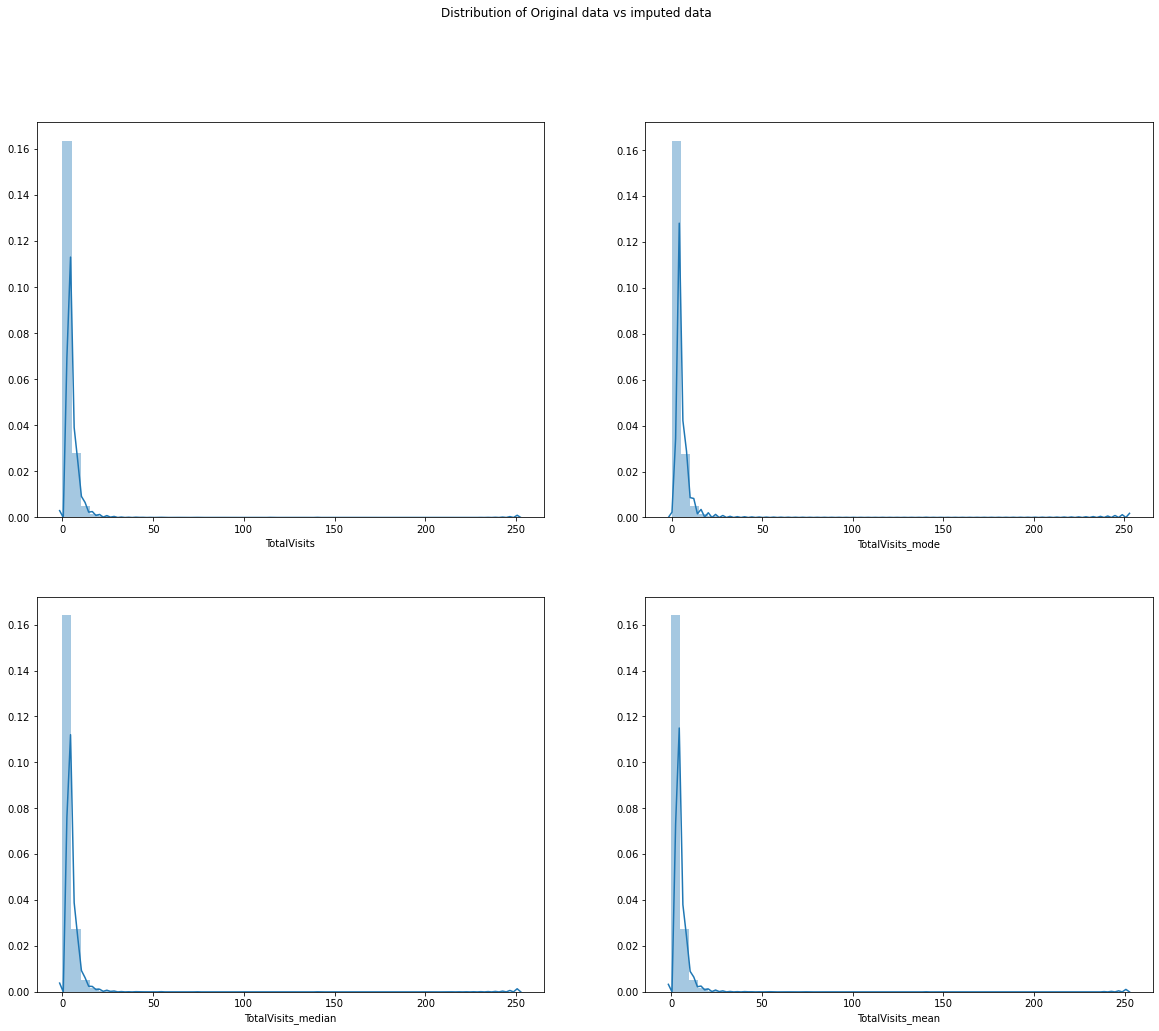

In [38]:
# Distribution of TotalVisits

tempDF = pd.DataFrame()
tempDF['TotalVisits_mode'] = leads_df1['TotalVisits'].fillna(leads_df1['TotalVisits'].mode()[0])
tempDF['TotalVisits_median'] = leads_df1['TotalVisits'].fillna(leads_df1['TotalVisits'].median())
tempDF['TotalVisits_mean'] = leads_df1['TotalVisits'].fillna(leads_df1['TotalVisits'].mean())

plt.figure(figsize=(20,16))
plt.suptitle('Distribution of Original data vs imputed data')
plt.subplot(221)
sns.distplot(leads_df1['TotalVisits'])
plt.subplot(222)
sns.distplot(tempDF['TotalVisits_mode'])
plt.subplot(223)
sns.distplot(tempDF['TotalVisits_median'])
plt.subplot(224)
sns.distplot(tempDF['TotalVisits_mean'])
plt.show()

##### We can impute the null values in "TotalVisits" by the median value as it resembles the original data closely.

In [39]:
#Replacing null with median value for TotalVisits column
leads_df1['TotalVisits'] = leads_df1['TotalVisits'].replace(np.nan, leads_df1['TotalVisits'].median())

In [40]:
#Checking the value counts for the column Total Visits
leads_df1['Page Views Per Visit'].value_counts(normalize=True)

0.00     0.240470
2.00     0.197188
3.00     0.131385
4.00     0.098429
1.00     0.071515
5.00     0.056794
1.50     0.033615
6.00     0.026804
2.50     0.026475
7.00     0.014611
3.50     0.010326
8.00     0.009447
1.33     0.007250
1.67     0.006591
2.33     0.006481
2.67     0.005932
9.00     0.004943
4.50     0.004724
1.75     0.003076
3.33     0.002966
10.00    0.002746
1.25     0.002527
5.50     0.002307
2.25     0.002087
11.00    0.001977
3.67     0.001758
6.50     0.001428
1.80     0.001428
2.75     0.001318
1.40     0.001208
2.20     0.000989
14.00    0.000989
4.33     0.000989
2.80     0.000989
3.25     0.000879
1.60     0.000879
2.17     0.000879
2.40     0.000659
13.00    0.000659
1.20     0.000549
12.00    0.000549
2.60     0.000439
15.00    0.000439
1.83     0.000439
1.71     0.000439
1.43     0.000439
3.40     0.000439
5.67     0.000330
1.38     0.000330
1.78     0.000330
1.57     0.000330
16.00    0.000330
4.25     0.000330
4.75     0.000330
2.09     0.000220
3.75     0

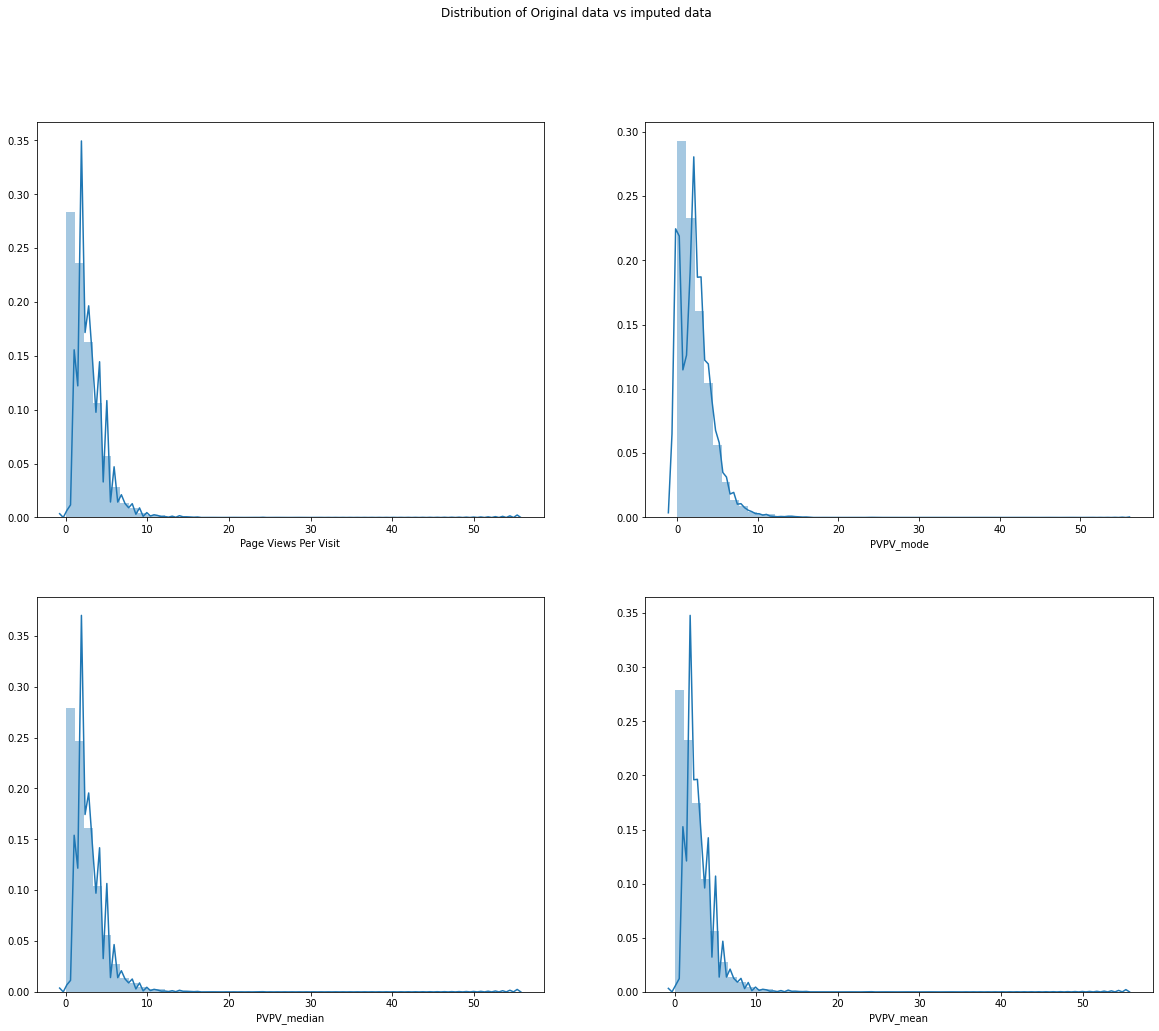

In [41]:
# Distribution of Page Views Per Visit

tempDF = pd.DataFrame()
tempDF['PVPV_mode'] = leads_df1['Page Views Per Visit'].fillna(leads_df1['Page Views Per Visit'].mode()[0])
tempDF['PVPV_median'] = leads_df1['Page Views Per Visit'].fillna(leads_df1['Page Views Per Visit'].median())
tempDF['PVPV_mean'] = leads_df1['Page Views Per Visit'].fillna(leads_df1['Page Views Per Visit'].mean())

plt.figure(figsize=(20,16))
plt.suptitle('Distribution of Original data vs imputed data')
plt.subplot(221)
sns.distplot(leads_df1['Page Views Per Visit'])
plt.subplot(222)
sns.distplot(tempDF['PVPV_mode'])
plt.subplot(223)
sns.distplot(tempDF['PVPV_median'])
plt.subplot(224)
sns.distplot(tempDF['PVPV_mean'])
plt.show()

##### We can impute the null values in "Page Views Per Visit" by the median value as it resembles the original data closely.

In [42]:
#Replacing null with median value for Page Views Per Visit column
leads_df1['Page Views Per Visit'] = leads_df1['Page Views Per Visit'].replace(np.nan, leads_df1['Page Views Per Visit'].median())

In [43]:
#Checking the value counts for the column Last Activity
leads_df1['Last Activity'].value_counts(dropna=False)

Email Opened                    3437
SMS Sent                        2745
Olark Chat Conversation          973
Page Visited on Website          640
Converted to Lead                428
Email Bounced                    326
Email Link Clicked               267
Form Submitted on Website        116
NaN                              103
Unreachable                       93
Unsubscribed                      61
Had a Phone Conversation          30
Approached upfront                 9
View in browser link Clicked       6
Email Received                     2
Email Marked Spam                  2
Visited Booth in Tradeshow         1
Resubscribed to emails             1
Name: Last Activity, dtype: int64

##### For null values of column "Last Activity", a new category can be added as "Not Mentioned".

In [44]:
#Replacing null values with new category for What is your current occupation column
leads_df1['Last Activity'] = leads_df1['Last Activity'].replace(np.nan, 'Not Mentioned')

In [45]:
#Checking missing values in dataframe
e = round(leads_df1.isnull().sum()/len(leads_df1),2)
e.sort_values(ascending=False)

Last Notable Activity                     0.0
A free copy of Mastering The Interview    0.0
Lead Number                               0.0
Lead Origin                               0.0
Lead Source                               0.0
Do Not Email                              0.0
Do Not Call                               0.0
Converted                                 0.0
TotalVisits                               0.0
Total Time Spent on Website               0.0
Page Views Per Visit                      0.0
Last Activity                             0.0
What is your current occupation           0.0
Search                                    0.0
Newspaper Article                         0.0
X Education Forums                        0.0
Newspaper                                 0.0
Digital Advertisement                     0.0
Through Recommendations                   0.0
Prospect ID                               0.0
dtype: float64

##### The null values in the columns have either been imputed or dropped when frequency of one value is more than 70%. 

In [46]:
leads_df1.shape

(9240, 20)

#### Outlier Treatment

In [47]:
leads_df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 20 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   Prospect ID                             9240 non-null   object 
 1   Lead Number                             9240 non-null   int64  
 2   Lead Origin                             9240 non-null   object 
 3   Lead Source                             9204 non-null   object 
 4   Do Not Email                            9240 non-null   object 
 5   Do Not Call                             9240 non-null   object 
 6   Converted                               9240 non-null   int64  
 7   TotalVisits                             9240 non-null   float64
 8   Total Time Spent on Website             9240 non-null   int64  
 9   Page Views Per Visit                    9240 non-null   float64
 10  Last Activity                           9240 non-null   obje

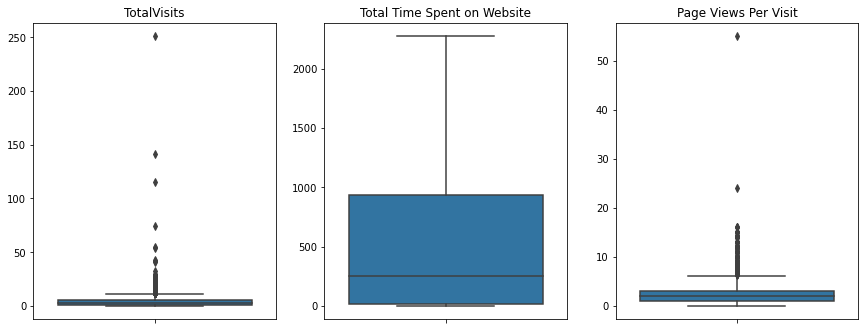

In [48]:
# Boxplot of relevant columns for identifying outliers
plt.figure(figsize=(20,12))

cols = ['TotalVisits','Total Time Spent on Website','Page Views Per Visit']

for i in enumerate(cols):
    plt.subplot(2,4,i[0]+1)
    sns.boxplot(y=leads_df1[i[1]])
    plt.title(i[1])
    plt.ylabel("")

In [49]:
#Checking summary statistics of above columns
leads_df1[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']].describe(percentiles=[.25,.5,.75,.90,.95,.99])

,TotalVisits,Total Time Spent on Website,Page Views Per Visit
count,9240.000000,9240.000000,9240.000000
mean,3.438636,487.698268,2.357440
std,4.819024,548.021466,2.145781
min,0.000000,0.000000,0.000000
25%,1.000000,12.000000,1.000000
50%,3.000000,248.000000,2.000000
75%,5.000000,936.000000,3.000000
90%,7.000000,1380.000000,5.000000
95%,10.000000,1562.000000,6.000000
99%,17.000000,1840.610000,9.000000


In [50]:
# Removing values beyond 99% for TotalVisits
tv_q99 = leads_df1['TotalVisits'].quantile(0.99)
leads_df1 = leads_df1[leads_df1["TotalVisits"] < tv_q99]
leads_df1["TotalVisits"].describe(percentiles=[.25,.5,.75,.90,.95,.99])

count    9141.000000
mean        3.179740
std         2.913631
min         0.000000
25%         1.000000
50%         3.000000
75%         5.000000
90%         7.000000
95%         9.000000
99%        13.000000
max        16.000000
Name: TotalVisits, dtype: float64

In [51]:
#Checking summary statistics of above columns
leads_df1[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']].describe(percentiles=[.25,.5,.75,.90,.95,.99])

,TotalVisits,Total Time Spent on Website,Page Views Per Visit
count,9141.000000,9141.000000,9141.000000
mean,3.179740,486.074609,2.329506
std,2.913631,547.856302,2.046673
min,0.000000,0.000000,0.000000
25%,1.000000,10.000000,1.000000
50%,3.000000,247.000000,2.000000
75%,5.000000,933.000000,3.000000
90%,7.000000,1379.000000,5.000000
95%,9.000000,1561.000000,6.000000
99%,13.000000,1839.600000,9.000000


In [52]:
# Removing values beyond 99% for Page Views Per Visit
pv_q99 = leads_df1['Page Views Per Visit'].quantile(0.99)
leads_df1 = leads_df1[leads_df1["Page Views Per Visit"] < pv_q99]
leads_df1["Page Views Per Visit"].describe(percentiles=[.25,.5,.75,.90,.95,.99])

count    9029.000000
mean        2.226383
std         1.823395
min         0.000000
25%         1.000000
50%         2.000000
75%         3.000000
90%         5.000000
95%         6.000000
99%         7.000000
max         8.000000
Name: Page Views Per Visit, dtype: float64

In [53]:
#Checking summary statistics of above columns
leads_df1[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']].describe(percentiles=[.25,.5,.75,.90,.95,.99])

,TotalVisits,Total Time Spent on Website,Page Views Per Visit
count,9029.000000,9029.000000,9029.000000
mean,3.087164,483.133016,2.226383
std,2.801244,547.420675,1.823395
min,0.000000,0.000000,0.000000
25%,1.000000,7.000000,1.000000
50%,3.000000,245.000000,2.000000
75%,4.000000,929.000000,3.000000
90%,7.000000,1378.000000,5.000000
95%,8.000000,1558.000000,6.000000
99%,13.000000,1839.720000,7.000000


In [54]:
#Calculating the percentage of data retained

data_ret = round(100*(len(leads_df1)/9240),2)
print('Percentage of data retained: ',data_ret)

Percentage of data retained:  97.72


##### We observe that after cleaning the dataframe, around 98% of the data is retained.

### Step 3: Data Preparation

#### Converting some binary variables (Yes/No) to 0/1

In [55]:
leads_df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9029 entries, 0 to 9239
Data columns (total 20 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   Prospect ID                             9029 non-null   object 
 1   Lead Number                             9029 non-null   int64  
 2   Lead Origin                             9029 non-null   object 
 3   Lead Source                             8993 non-null   object 
 4   Do Not Email                            9029 non-null   object 
 5   Do Not Call                             9029 non-null   object 
 6   Converted                               9029 non-null   int64  
 7   TotalVisits                             9029 non-null   float64
 8   Total Time Spent on Website             9029 non-null   int64  
 9   Page Views Per Visit                    9029 non-null   float64
 10  Last Activity                           9029 non-null   obje

In [56]:
#Checking columns with unique values
leads_df1.nunique()

Prospect ID                               9029
Lead Number                               9029
Lead Origin                                  5
Lead Source                                 20
Do Not Email                                 2
Do Not Call                                  2
Converted                                    2
TotalVisits                                 17
Total Time Spent on Website               1717
Page Views Per Visit                        57
Last Activity                               18
What is your current occupation              7
Search                                       2
Newspaper Article                            1
X Education Forums                           1
Newspaper                                    2
Digital Advertisement                        2
Through Recommendations                      2
A free copy of Mastering The Interview       2
Last Notable Activity                       16
dtype: int64

In [57]:
#Checking column values holding only 2 unique values
for col in leads_df1[['Do Not Email','Do Not Call','Search','Newspaper',
                      'Digital Advertisement','Through Recommendations','A free copy of Mastering The Interview']]:
    print("\n" + col)
    print(leads_df1[col].value_counts())
    


Do Not Email
No     8327
Yes     702
Name: Do Not Email, dtype: int64

Do Not Call
No     9027
Yes       2
Name: Do Not Call, dtype: int64

Search
No     9016
Yes      13
Name: Search, dtype: int64

Newspaper
No     9028
Yes       1
Name: Newspaper, dtype: int64

Digital Advertisement
No     9027
Yes       2
Name: Digital Advertisement, dtype: int64

Through Recommendations
No     9023
Yes       6
Name: Through Recommendations, dtype: int64

A free copy of Mastering The Interview
No     6269
Yes    2760
Name: A free copy of Mastering The Interview, dtype: int64


In [58]:
# List of variables to map

varlist =  ['Do Not Email','Do Not Call','Search','Newspaper','Digital Advertisement','Through Recommendations',
            'A free copy of Mastering The Interview']

# Defining the map function
def binary_map(x):
    return x.map({'Yes': 1, "No": 0})

# Applying the function to the columns
leads_df1[varlist] = leads_df1[varlist].apply(binary_map)

#### For categorical variables with multiple levels, create dummy features (one-hot encoded)

In [59]:
leads_df1.shape

(9029, 20)

In [60]:
#Checking column values holding multiple unique values
for col in leads_df1[['Lead Origin','Lead Source','Last Activity','What is your current occupation','Last Notable Activity']]:
    print("\n" + col)
    print(leads_df1[col].value_counts(normalize=True)*100)


Lead Origin
Landing Page Submission    52.231698
API                        39.207000
Lead Add Form               7.941079
Lead Import                 0.609148
Quick Add Form              0.011075
Name: Lead Origin, dtype: float64

Lead Source
Google               31.446681
Direct Traffic       27.577004
Olark Chat           19.470699
Organic Search       11.887023
Reference             5.926832
Welingak Website      1.579006
Referral Sites        1.256533
Facebook              0.611587
bing                  0.066719
Click2call            0.044479
Live Chat             0.022240
Social Media          0.022240
Pay per Click Ads     0.011120
WeLearn               0.011120
NC_EDM                0.011120
testone               0.011120
welearnblog_Home      0.011120
blog                  0.011120
youtubechannel        0.011120
Press_Release         0.011120
Name: Lead Source, dtype: float64

Last Activity
Email Opened                    37.290951
SMS Sent                        29.748588
Ol

In [61]:
# Creating dummies for the following categorical columns 

# Lead Origin : 
lead_ori = pd.get_dummies(leads_df1['Lead Origin'], prefix='LeadOrigin')
# Dropping Quick Add Form column
lead_ori1 = lead_ori.drop(['LeadOrigin_Quick Add Form'], 1)
#Adding the results to the master dataframe
leads_df1 = pd.concat([leads_df1, lead_ori1], axis = 1)

# Lead Source :
lead_src = pd.get_dummies(leads_df1['Lead Source'], prefix='LeadSource')
# Dropping NC_EDM column
lead_src1 = lead_src.drop(['LeadSource_NC_EDM'], 1)
# Adding the results to the master dataframe
leads_df1 = pd.concat([leads_df1,lead_src1], axis=1)

# Last Activity
last_act = pd.get_dummies(leads_df1['Last Activity'], prefix='LastActivity')
# Dropping Not Mentioned column
last_act1 = last_act.drop(['LastActivity_Resubscribed to emails'], 1)
# Adding the results to the master dataframe
leads_df1 = pd.concat([leads_df1,last_act1], axis=1)

# What is your current occupation
curr_ocp = pd.get_dummies(leads_df1['What is your current occupation'], prefix='CurrentOccupation')
# Dropping Businessman column
curr_ocp1 = curr_ocp.drop(['CurrentOccupation_Businessman'], 1)
# Adding the results to the master dataframe
leads_df1 = pd.concat([leads_df1,curr_ocp1], axis=1)

# Last Notable Activity
last_not_act = pd.get_dummies(leads_df1['Last Notable Activity'], prefix='LastNotableActivity')
# Dropping Resubscribed to emails column
last_not_act1 = last_not_act.drop(['LastNotableActivity_Resubscribed to emails'], 1)
# Adding the results to the master dataframe
leads_df1 = pd.concat([leads_df1,last_not_act1], axis=1)

In [62]:
leads_df1.shape

(9029, 81)

In [63]:
leads_df1.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,What is your current occupation,Search,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,A free copy of Mastering The Interview,Last Notable Activity,LeadOrigin_API,LeadOrigin_Landing Page Submission,LeadOrigin_Lead Add Form,LeadOrigin_Lead Import,LeadSource_Click2call,LeadSource_Direct Traffic,LeadSource_Facebook,LeadSource_Google,LeadSource_Live Chat,LeadSource_Olark Chat,LeadSource_Organic Search,LeadSource_Pay per Click Ads,LeadSource_Press_Release,LeadSource_Reference,LeadSource_Referral Sites,LeadSource_Social Media,LeadSource_WeLearn,LeadSource_Welingak Website,LeadSource_bing,LeadSource_blog,LeadSource_testone,LeadSource_welearnblog_Home,LeadSource_youtubechannel,LastActivity_Approached upfront,LastActivity_Converted to Lead,LastActivity_Email Bounced,LastActivity_Email Link Clicked,LastActivity_Email Marked Spam,LastActivity_Email Opened,LastActivity_Email Received,LastActivity_Form Submitted on Website,LastActivity_Had a Phone Conversation,LastActivity_Not Mentioned,LastActivity_Olark Chat Conversation,LastActivity_Page Visited on Website,LastActivity_SMS Sent,LastActivity_Unreachable,LastActivity_Unsubscribed,LastActivity_View in browser link Clicked,LastActivity_Visited Booth in Tradeshow,CurrentOccupation_Housewife,CurrentOccupation_Not Avaiable,CurrentOccupation_Other,CurrentOccupation_Student,CurrentOccupation_Unemployed,CurrentOccupation_Working Professional,LastNotableActivity_Approached upfront,LastNotableActivity_Email Bounced,LastNotableActivity_Email Link Clicked,LastNotableActivity_Email Marked Spam,LastNotableActivity_Email Opened,LastNotableActivity_Email Received,LastNotableActivity_Form Submitted on Website,LastNotableActivity_Had a Phone Conversation,LastNotableActivity_Modified,LastNotableActivity_Olark Chat Conversation,LastNotableActivity_Page Visited on Website,LastNotableActivity_SMS Sent,LastNotableActivity_Unreachable,LastNotableActivity_Unsubscribed,LastNotableActivity_View in browser link Clicked
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,0,0,0,0.0,0,0.0,Page Visited on Website,Unemployed,0,No,No,0,0,0,0,Modified,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,0,0,0,5.0,674,2.5,Email Opened,Unemployed,0,No,No,0,0,0,0,Email Opened,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,0,0,1,2.0,1532,2.0,Email Opened,Student,0,No,No,0,0,0,1,Email Opened,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,0,0,0,1.0,305,1.0,Unreachable,Unemployed,0,No,No,0,0,0,0,Modified,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,0,0,1,2.0,1428,1.0,Converted to Lead,Unemployed,0,No,No,0,0,0,0,Modified,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0


##### Removing unnecessary columns from the dataframe after one-hot encoding:
1. Prospect ID
2. Lead Number
3. Lead Origin
4. Lead Source
5. Last Activity
6. What is your current occupation
7. Last Notable Activity
8. Newspaper Article
9. Newspaper
10. X Education Forums

In [64]:
#Dropping columns after one-hot encoding
leads_df1 = leads_df1.drop(['Prospect ID','Lead Number','Lead Origin','Lead Source','Last Activity',
                            'What is your current occupation','Last Notable Activity','Newspaper Article',
                            'Newspaper','X Education Forums'], axis = 1)

In [65]:
leads_df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9029 entries, 0 to 9239
Data columns (total 71 columns):
 #   Column                                            Non-Null Count  Dtype  
---  ------                                            --------------  -----  
 0   Do Not Email                                      9029 non-null   int64  
 1   Do Not Call                                       9029 non-null   int64  
 2   Converted                                         9029 non-null   int64  
 3   TotalVisits                                       9029 non-null   float64
 4   Total Time Spent on Website                       9029 non-null   int64  
 5   Page Views Per Visit                              9029 non-null   float64
 6   Search                                            9029 non-null   int64  
 7   Digital Advertisement                             9029 non-null   int64  
 8   Through Recommendations                           9029 non-null   int64  
 9   A free copy of Mast

In [66]:
leads_df1.shape

(9029, 71)

In [67]:
#Checking missing values in dataframe
e = round(leads_df1.isnull().sum()/len(leads_df1),2)
e.sort_values(ascending=False)

LastNotableActivity_View in browser link Clicked    0.0
LeadSource_Social Media                             0.0
LeadSource_Olark Chat                               0.0
LeadSource_Organic Search                           0.0
LeadSource_Pay per Click Ads                        0.0
LeadSource_Press_Release                            0.0
LeadSource_Reference                                0.0
LeadSource_Referral Sites                           0.0
LeadSource_WeLearn                                  0.0
LeadSource_Google                                   0.0
LeadSource_Welingak Website                         0.0
LeadSource_bing                                     0.0
LeadSource_blog                                     0.0
LeadSource_testone                                  0.0
LeadSource_welearnblog_Home                         0.0
LeadSource_youtubechannel                           0.0
LeadSource_Live Chat                                0.0
LeadSource_Facebook                             

### Step 4: Test-Train Split

In [68]:
from sklearn.model_selection import train_test_split

In [69]:
#Putting feature variable to X
X = leads_df1.drop(['Converted'], axis=1)
X.head()

,Do Not Email,Do Not Call,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Search,Digital Advertisement,Through Recommendations,A free copy of Mastering The Interview,LeadOrigin_API,LeadOrigin_Landing Page Submission,LeadOrigin_Lead Add Form,LeadOrigin_Lead Import,LeadSource_Click2call,LeadSource_Direct Traffic,LeadSource_Facebook,LeadSource_Google,LeadSource_Live Chat,LeadSource_Olark Chat,LeadSource_Organic Search,LeadSource_Pay per Click Ads,LeadSource_Press_Release,LeadSource_Reference,LeadSource_Referral Sites,LeadSource_Social Media,LeadSource_WeLearn,LeadSource_Welingak Website,LeadSource_bing,LeadSource_blog,LeadSource_testone,LeadSource_welearnblog_Home,LeadSource_youtubechannel,LastActivity_Approached upfront,LastActivity_Converted to Lead,LastActivity_Email Bounced,LastActivity_Email Link Clicked,LastActivity_Email Marked Spam,LastActivity_Email Opened,LastActivity_Email Received,LastActivity_Form Submitted on Website,LastActivity_Had a Phone Conversation,LastActivity_Not Mentioned,LastActivity_Olark Chat Conversation,LastActivity_Page Visited on Website,LastActivity_SMS Sent,LastActivity_Unreachable,LastActivity_Unsubscribed,LastActivity_View in browser link Clicked,LastActivity_Visited Booth in Tradeshow,CurrentOccupation_Housewife,CurrentOccupation_Not Avaiable,CurrentOccupation_Other,CurrentOccupation_Student,CurrentOccupation_Unemployed,CurrentOccupation_Working Professional,LastNotableActivity_Approached upfront,LastNotableActivity_Email Bounced,LastNotableActivity_Email Link Clicked,LastNotableActivity_Email Marked Spam,LastNotableActivity_Email Opened,LastNotableActivity_Email Received,LastNotableActivity_Form Submitted on Website,LastNotableActivity_Had a Phone Conversation,LastNotableActivity_Modified,LastNotableActivity_Olark Chat Conversation,LastNotableActivity_Page Visited on Website,LastNotableActivity_SMS Sent,LastNotableActivity_Unreachable,LastNotableActivity_Unsubscribed,LastNotableActivity_View in browser link Clicked
0,0,0,0.0,0,0.0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
1,0,0,5.0,674,2.5,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
2,0,0,2.0,1532,2.0,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
3,0,0,1.0,305,1.0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
4,0,0,2.0,1428,1.0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0


In [70]:
# Putting response variable to y
y = leads_df1['Converted']
y.head()

0    0
1    0
2    1
3    0
4    1
Name: Converted, dtype: int64

In [71]:
# Splitting the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=100)

### Step 5: Feature Scaling

In [72]:
from sklearn.preprocessing import StandardScaler

In [73]:
scaler = StandardScaler()

X_train[['TotalVisits','Total Time Spent on Website',
         'Page Views Per Visit']] = scaler.fit_transform(X_train[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']])

X_train.head()

,Do Not Email,Do Not Call,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Search,Digital Advertisement,Through Recommendations,A free copy of Mastering The Interview,LeadOrigin_API,LeadOrigin_Landing Page Submission,LeadOrigin_Lead Add Form,LeadOrigin_Lead Import,LeadSource_Click2call,LeadSource_Direct Traffic,LeadSource_Facebook,LeadSource_Google,LeadSource_Live Chat,LeadSource_Olark Chat,LeadSource_Organic Search,LeadSource_Pay per Click Ads,LeadSource_Press_Release,LeadSource_Reference,LeadSource_Referral Sites,LeadSource_Social Media,LeadSource_WeLearn,LeadSource_Welingak Website,LeadSource_bing,LeadSource_blog,LeadSource_testone,LeadSource_welearnblog_Home,LeadSource_youtubechannel,LastActivity_Approached upfront,LastActivity_Converted to Lead,LastActivity_Email Bounced,LastActivity_Email Link Clicked,LastActivity_Email Marked Spam,LastActivity_Email Opened,LastActivity_Email Received,LastActivity_Form Submitted on Website,LastActivity_Had a Phone Conversation,LastActivity_Not Mentioned,LastActivity_Olark Chat Conversation,LastActivity_Page Visited on Website,LastActivity_SMS Sent,LastActivity_Unreachable,LastActivity_Unsubscribed,LastActivity_View in browser link Clicked,LastActivity_Visited Booth in Tradeshow,CurrentOccupation_Housewife,CurrentOccupation_Not Avaiable,CurrentOccupation_Other,CurrentOccupation_Student,CurrentOccupation_Unemployed,CurrentOccupation_Working Professional,LastNotableActivity_Approached upfront,LastNotableActivity_Email Bounced,LastNotableActivity_Email Link Clicked,LastNotableActivity_Email Marked Spam,LastNotableActivity_Email Opened,LastNotableActivity_Email Received,LastNotableActivity_Form Submitted on Website,LastNotableActivity_Had a Phone Conversation,LastNotableActivity_Modified,LastNotableActivity_Olark Chat Conversation,LastNotableActivity_Page Visited on Website,LastNotableActivity_SMS Sent,LastNotableActivity_Unreachable,LastNotableActivity_Unsubscribed,LastNotableActivity_View in browser link Clicked
5493,0,0,-0.394290,-0.708153,-0.135234,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
8064,0,0,-0.039721,-0.711823,0.410454,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
4716,1,0,-0.039721,-0.471434,0.410454,0,0,0,1,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
9117,0,0,-1.103429,-0.884316,-1.226608,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
2402,0,0,1.023987,0.704822,-0.135234,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0


In [74]:
#Checking the Conversion Rate
converted = (sum(leads_df1['Converted'])/len(leads_df1['Converted'].index))*100
converted

38.50924797873519

##### We have almost 38% conversion rate.

### Step 6: Model Building

#### Running the First Training Model

In [75]:
import statsmodels.api as sm

In [76]:
# Logistic regression model
logm1 = sm.GLM(y_train,(sm.add_constant(X_train)), family = sm.families.Binomial())
logm1.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6320
Model:                            GLM   Df Residuals:                     6258
Model Family:                Binomial   Df Model:                           61
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                    nan
Date:                Mon, 24 May 2021   Deviance:                          nan
Time:                        00:31:32   Pearson chi2:                 6.33e+18
No. Iterations:                   100                                         
Covariance Type:            nonrobust                                         
====================================================================================================================
                                                       coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------------------
const                                             3.391e+15    6.2e+07   5.47e+07      0.000    3.39e+15    3.39e+15
Do Not Email                                     -5.881e+14   4.55e+06  -1.29e+08      0.000   -5.88e+14   -5.88e+14
Do Not Call                                         33.0319   3.14e-07   1.05e+08      0.000      33.032      33.032
TotalVisits                                       7.032e+13   1.33e+06   5.29e+07      0.000    7.03e+13    7.03e+13
Total Time Spent on Website                       3.343e+14   9.81e+05   3.41e+08      0.000    3.34e+14    3.34e+14
Page Views Per Visit                              2.494e+12   1.45e+06   1.71e+06      0.000    2.49e+12    2.49e+12
Search                                           -2.937e+14   2.14e+07  -1.37e+07      0.000   -2.94e+14   -2.94e+14
Digital Advertisement                              9.63e+15   6.73e+07   1.43e+08      0.000    9.63e+15    9.63e+15
Through Recommendations                           6.567e+15   3.39e+07   1.94e+08      0.000    6.57e+15    6.57e+15
A free copy of Mastering The Interview            1.322e+14   2.67e+06   4.94e+07      0.000    1.32e+14    1.32e+14
LeadOrigin_API                                    5.261e+14   2.38e+07   2.21e+07      0.000    5.26e+14    5.26e+14
LeadOrigin_Landing Page Submission                4.136e+14   2.37e+07   1.74e+07      0.000    4.14e+14    4.14e+14
LeadOrigin_Lead Add Form                          2.137e+15   2.48e+07   8.61e+07      0.000    2.14e+15    2.14e+15
LeadOrigin_Lead Import                            3.137e+14   4.11e+07   7.63e+06      0.000    3.14e+14    3.14e+14
LeadSource_Click2call                             1.537e+15    4.1e+07   3.75e+07      0.000    1.54e+15    1.54e+15
LeadSource_Direct Traffic                         3.568e+14   3.24e+07    1.1e+07      0.000    3.57e+14    3.57e+14
LeadSource_Facebook                               3.039e+14   5.06e+07   6.01e+06      0.000    3.04e+14    3.04e+14
LeadSource_Google                                 4.208e+14   3.23e+07    1.3e+07      0.000    4.21e+14    4.21e+14
LeadSource_Live Chat                              1.551e+15   4.93e+07   3.15e+07      0.000    1.55e+15    1.55e+15
LeadSource_Olark Chat                             5.017e+14   3.23e+07   1.55e+07      0.000    5.02e+14    5.02e+14
LeadSource_Organic Search                         3.423e+14   3.24e+07   1.06e+07      0.000    3.42e+14    3.42e+14
LeadSource_Pay per Click Ads                        -0.6121   2.25e-07  -2.72e+06      0.000      -0.612      -0.612
LeadSource_Press_Release                          -9.92e+14   7.48e+07  -1.33e+07      0.000   -9.92e+14   -9.92e+14
LeadSource_Reference                     

### Step 7: Feature Selection using RFE

In [77]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()

In [78]:
from sklearn.feature_selection import RFE
#Running RFE with 15 variables as output
rfe = RFE(logreg, 15)            
rfe = rfe.fit(X_train, y_train)

In [79]:
rfe.support_

array([ True, False, False,  True, False, False, False, False, False,
       False, False,  True, False, False, False, False, False, False,
        True, False, False, False, False, False, False, False,  True,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False,  True,  True, False, False,
       False, False, False, False,  True,  True, False, False, False,
        True, False, False,  True, False,  True, False, False, False,
        True,  True,  True, False, False, False, False])

In [80]:
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('Do Not Email', True, 1),
 ('Do Not Call', False, 55),
 ('TotalVisits', False, 34),
 ('Total Time Spent on Website', True, 1),
 ('Page Views Per Visit', False, 36),
 ('Search', False, 40),
 ('Digital Advertisement', False, 26),
 ('Through Recommendations', False, 11),
 ('A free copy of Mastering The Interview', False, 51),
 ('LeadOrigin_API', False, 8),
 ('LeadOrigin_Landing Page Submission', False, 7),
 ('LeadOrigin_Lead Add Form', True, 1),
 ('LeadOrigin_Lead Import', False, 35),
 ('LeadSource_Click2call', False, 23),
 ('LeadSource_Direct Traffic', False, 15),
 ('LeadSource_Facebook', False, 14),
 ('LeadSource_Google', False, 18),
 ('LeadSource_Live Chat', False, 43),
 ('LeadSource_Olark Chat', True, 1),
 ('LeadSource_Organic Search', False, 17),
 ('LeadSource_Pay per Click Ads', False, 53),
 ('LeadSource_Press_Release', False, 50),
 ('LeadSource_Reference', False, 20),
 ('LeadSource_Referral Sites', False, 16),
 ('LeadSource_Social Media', False, 19),
 ('LeadSource_WeLearn', False

In [81]:
col = X_train.columns[rfe.support_]

In [82]:
X_train.columns[~rfe.support_]

Index(['Do Not Call', 'TotalVisits', 'Page Views Per Visit', 'Search', 'Digital Advertisement', 'Through Recommendations', 'A free copy of Mastering The Interview', 'LeadOrigin_API', 'LeadOrigin_Landing Page Submission', 'LeadOrigin_Lead Import', 'LeadSource_Click2call', 'LeadSource_Direct Traffic', 'LeadSource_Facebook', 'LeadSource_Google', 'LeadSource_Live Chat', 'LeadSource_Organic Search', 'LeadSource_Pay per Click Ads', 'LeadSource_Press_Release', 'LeadSource_Reference', 'LeadSource_Referral Sites', 'LeadSource_Social Media', 'LeadSource_WeLearn', 'LeadSource_bing', 'LeadSource_blog', 'LeadSource_testone', 'LeadSource_welearnblog_Home', 'LeadSource_youtubechannel', 'LastActivity_Approached upfront', 'LastActivity_Converted to Lead', 'LastActivity_Email Bounced', 'LastActivity_Email Link Clicked', 'LastActivity_Email Marked Spam', 'LastActivity_Email Opened', 'LastActivity_Email Received', 'LastActivity_Form Submitted on Website', 'LastActivity_Had a Phone Conversation',
       'L

#### Assessing the model with statsmodel

#### Model 2

In [83]:
X_train_sm = sm.add_constant(X_train[col])
logm2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6320
Model:                            GLM   Df Residuals:                     6304
Model Family:                Binomial   Df Model:                           15
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2550.9
Date:                Mon, 24 May 2021   Deviance:                       5101.8
Time:                        00:31:43   Pearson chi2:                 6.54e+03
No. Iterations:                    21                                         
Covariance Type:            nonrobust                                         
===============================================================================================================
                                                  coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------------
const                                           0.3968      0.072      5.486      0.000       0.255       0.539
Do Not Email                                   -1.6218      0.173     -9.362      0.000      -1.961      -1.282
Total Time Spent on Website                     1.1079      0.041     27.171      0.000       1.028       1.188
LeadOrigin_Lead Add Form                        3.6703      0.216     17.002      0.000       3.247       4.093
LeadSource_Olark Chat                           1.3641      0.106     12.815      0.000       1.155       1.573
LeadSource_Welingak Website                     2.1448      0.746      2.876      0.004       0.683       3.606
LastActivity_Not Mentioned                     -1.4573      0.448     -3.250      0.001      -2.336      -0.579
LastActivity_Olark Chat Conversation           -1.1018      0.192     -5.735      0.000      -1.478      -0.725
CurrentOccupation_Housewife                    22.9351   1.72e+04      0.001      0.999   -3.36e+04    3.36e+04
CurrentOccupation_Not Avaiable                 -1.1264      0.089    -12.689      0.000      -1.300      -0.952
CurrentOccupation_Working Professional          2.3267      0.180     12.897      0.000       1.973       2.680
LastNotableActivity_Email Link Clicked         -1.6145      0.260     -6.214      0.000      -2.124      -1.105
LastNotableActivity_Email Opened               -1.3823      0.090    -15.382      0.000      -1.558      -1.206
LastNotableActivity_Modified                   -1.8352      0.099    -18.601      0.000      -2.029      -1.642
LastNotableActivity_Olark Chat Conversation    -1.5216      0.371     -4.098      0.000      -2.249      -0.794
LastNotableActivity_Page Visited on Website    -1.6541      0.213     -7.769      0.000      -2.071      -1.237
===============================================================================================================
"""

##### Removing column "CurrentOccupation_Housewife" based on its high p-value (0.999), making it insignificant.

In [84]:
col = col.drop('CurrentOccupation_Housewife',1)

#### Model 3

In [85]:
X_train_sm = sm.add_constant(X_train[col])
logm3 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm3.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6320
Model:                            GLM   Df Residuals:                     6305
Model Family:                Binomial   Df Model:                           14
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2555.8
Date:                Mon, 24 May 2021   Deviance:                       5111.5
Time:                        00:31:44   Pearson chi2:                 6.55e+03
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
===============================================================================================================
                                                  coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------------
const                                           0.3986      0.072      5.511      0.000       0.257       0.540
Do Not Email                                   -1.6232      0.173     -9.371      0.000      -1.963      -1.284
Total Time Spent on Website                     1.1075      0.041     27.192      0.000       1.028       1.187
LeadOrigin_Lead Add Form                        3.6715      0.216     17.021      0.000       3.249       4.094
LeadSource_Olark Chat                           1.3599      0.106     12.784      0.000       1.151       1.568
LeadSource_Welingak Website                     2.1387      0.746      2.868      0.004       0.677       3.600
LastActivity_Not Mentioned                     -1.4629      0.448     -3.264      0.001      -2.342      -0.584
LastActivity_Olark Chat Conversation           -1.1031      0.192     -5.743      0.000      -1.480      -0.727
CurrentOccupation_Not Avaiable                 -1.1303      0.089    -12.740      0.000      -1.304      -0.956
CurrentOccupation_Working Professional          2.3214      0.180     12.870      0.000       1.968       2.675
LastNotableActivity_Email Link Clicked         -1.6136      0.260     -6.210      0.000      -2.123      -1.104
LastNotableActivity_Email Opened               -1.3750      0.090    -15.317      0.000      -1.551      -1.199
LastNotableActivity_Modified                   -1.8315      0.099    -18.577      0.000      -2.025      -1.638
LastNotableActivity_Olark Chat Conversation    -1.5178      0.371     -4.087      0.000      -2.246      -0.790
LastNotableActivity_Page Visited on Website    -1.6540      0.213     -7.769      0.000      -2.071      -1.237
===============================================================================================================
"""

##### Model 3 has all variables with low p-values, making it stable.

##### Based on the coefficient values of the final model, the top three variables contributing towards lead conversion rate are:
1. LeadOrigin_Lead Add Form (from column Lead Origin)
2. CurrentOccupation_Working Professional (from column What is your current occupation)
3. LeadSource_Wellingak Website (from column Lead Source)

In [86]:
#Getting the predicted values on the train set
y_train_pred = res.predict(X_train_sm)
y_train_pred[:10]

5493    0.098219
8064    0.097859
4716    0.008938
9117    0.355272
2402    0.451199
1796    0.036062
1120    0.036062
253     0.057678
1491    0.083388
2004    0.413602
dtype: float64

In [87]:
#Reshape
y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred[:10]

array([0.09821869, 0.09785926, 0.00893794, 0.3552717 , 0.45119942,
       0.03606219, 0.03606219, 0.05767761, 0.08338848, 0.41360152])

In [88]:
#Creating a dataframe with the actual converted flag and the predicted probabilities
y_train_pred_final = pd.DataFrame({'Converted':y_train.values, 'Converted_Prob':y_train_pred})
y_train_pred_final['LeadId'] = y_train.index
y_train_pred_final.head()

,Converted,Converted_Prob,LeadId
0,0,0.098219,5493
1,0,0.097859,8064
2,0,0.008938,4716
3,0,0.355272,9117
4,1,0.451199,2402


In [89]:
#Creating new column 'predicted' with 1 if Converted_Prob > 0.5 else 0
y_train_pred_final['predicted'] = y_train_pred_final.Converted_Prob.map(lambda x: 1 if x > 0.5 else 0)


y_train_pred_final.head()

,Converted,Converted_Prob,LeadId,predicted
0,0,0.098219,5493,0
1,0,0.097859,8064,0
2,0,0.008938,4716,0
3,0,0.355272,9117,0
4,1,0.451199,2402,0


#### Checking confusion metrics and accuracy

In [90]:
from sklearn import metrics

In [91]:
# Confusion matrix 
confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.predicted )
print(confusion)

[[3459  450]
 [ 727 1684]]


In [92]:
#Checking the overall accuracy.

print(metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.predicted))

0.8137658227848101


##### Here, the model Accuracy is about 81% which is good but is not reliable. Hence, we need to calculate other metrics also.

#### Checking VIFs

In [93]:
# Check for the VIF values of the feature variables. 
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [94]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
6,LastActivity_Olark Chat Conversation,1.96
11,LastNotableActivity_Modified,1.76
3,LeadSource_Olark Chat,1.72
2,LeadOrigin_Lead Add Form,1.61
7,CurrentOccupation_Not Avaiable,1.58
12,LastNotableActivity_Olark Chat Conversation,1.32
4,LeadSource_Welingak Website,1.29
1,Total Time Spent on Website,1.23
10,LastNotableActivity_Email Opened,1.22
5,LastActivity_Not Mentioned,1.17


##### All the variables have a low VIF value and need not be dropped.

#### Metrics beyond accuracy

In [95]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [96]:
#Calculating other metrics of the model
print('Sensitivity:', TP / float(TP+FN))
print('Specificity:', TN / float(TN+FP))
print('False Positive Rate:', FP / float(TN+FP))
print('Positive predictive value:', TP / float(TP+FP))
print('Negative predictive value:', TN / float(TN+ FN))

Sensitivity: 0.6984653670676068
Specificity: 0.8848810437452034
False Positive Rate: 0.11511895625479662
Positive predictive value: 0.7891283973758201
Negative predictive value: 0.8263258480649786


### Step 8: Plotting the ROC Curve

#### An ROC curve demonstrates several things:

- It shows the tradeoff between sensitivity and specificity (any increase in sensitivity will be accompanied by a decrease in specificity).
- The closer the curve follows the left-hand border and then the top border of the ROC space, the more accurate the test.
- The closer the curve comes to the 45-degree diagonal of the ROC space, the less accurate the test.

In [97]:
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [98]:
fpr, tpr, thresholds = metrics.roc_curve( y_train_pred_final.Converted, y_train_pred_final.Converted_Prob, drop_intermediate = False )

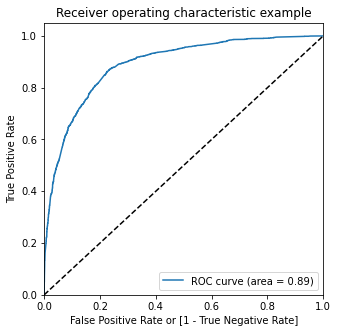

In [99]:
draw_roc(y_train_pred_final.Converted, y_train_pred_final.Converted_Prob)

### Step 9: Finding Optimal Cutoff Point

#### Optimal cutoff probability is that probability where we get balanced sensitivity and specificity

In [100]:
#Creating columns with different probability cutoffs 
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final.Converted_Prob.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

,Converted,Converted_Prob,LeadId,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,0,0.098219,5493,0,1,0,0,0,0,0,0,0,0,0
1,0,0.097859,8064,0,1,0,0,0,0,0,0,0,0,0
2,0,0.008938,4716,0,1,0,0,0,0,0,0,0,0,0
3,0,0.355272,9117,0,1,1,1,1,0,0,0,0,0,0
4,1,0.451199,2402,0,1,1,1,1,1,0,0,0,0,0


In [101]:
#Calculating accuracy, sensitivity and specificity for various probability cutoffs.

cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
from sklearn.metrics import confusion_matrix

# TP = confusion[1,1] # true positive 
# TN = confusion[0,0] # true negatives
# FP = confusion[0,1] # false positives
# FN = confusion[1,0] # false negatives

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

     prob  accuracy     sensi     speci
0.0   0.0  0.381487  1.000000  0.000000
0.1   0.1  0.605063  0.972625  0.378358
0.2   0.2  0.768038  0.909581  0.680737
0.3   0.3  0.806013  0.867275  0.768227
0.4   0.4  0.814715  0.784737  0.833205
0.5   0.5  0.813766  0.698465  0.884881
0.6   0.6  0.806487  0.625467  0.918138
0.7   0.7  0.783228  0.513065  0.949859
0.8   0.8  0.761234  0.422646  0.970069
0.9   0.9  0.715981  0.277063  0.986697


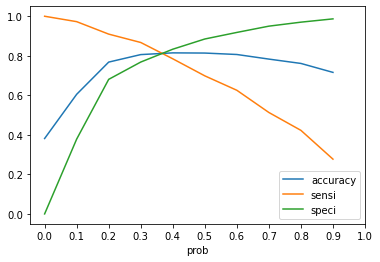

In [102]:
#Plotting accuracy, sensitivity and specificity for various probabilities.

cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'],xticks=[0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0])
plt.show()

##### From the curve above, 0.37 is the optimum point to take it as a cutoff probability.

In [103]:
#Making the final prediction using 0.37 as the cut off

y_train_pred_final['final_predicted'] = y_train_pred_final.Converted_Prob.map( lambda x: 1 if x > 0.37 else 0)
y_train_pred_final.head()

,Converted,Converted_Prob,LeadId,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted
0,0,0.098219,5493,0,1,0,0,0,0,0,0,0,0,0,0
1,0,0.097859,8064,0,1,0,0,0,0,0,0,0,0,0,0
2,0,0.008938,4716,0,1,0,0,0,0,0,0,0,0,0,0
3,0,0.355272,9117,0,1,1,1,1,0,0,0,0,0,0,0
4,1,0.451199,2402,0,1,1,1,1,1,0,0,0,0,0,1


In [104]:
#Calculating the lead score

y_train_pred_final['lead_score'] = y_train_pred_final.Converted_Prob.map(lambda x: round(x*100))
y_train_pred_final.head(20)

,Converted,Converted_Prob,LeadId,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted,lead_score
0,0,0.098219,5493,0,1,0,0,0,0,0,0,0,0,0,0,10
1,0,0.097859,8064,0,1,0,0,0,0,0,0,0,0,0,0,10
2,0,0.008938,4716,0,1,0,0,0,0,0,0,0,0,0,0,1
3,0,0.355272,9117,0,1,1,1,1,0,0,0,0,0,0,0,36
4,1,0.451199,2402,0,1,1,1,1,1,0,0,0,0,0,1,45
5,0,0.036062,1796,0,1,0,0,0,0,0,0,0,0,0,0,4
6,0,0.036062,1120,0,1,0,0,0,0,0,0,0,0,0,0,4
7,0,0.057678,253,0,1,0,0,0,0,0,0,0,0,0,0,6
8,0,0.083388,1491,0,1,0,0,0,0,0,0,0,0,0,0,8
9,1,0.413602,2004,0,1,1,1,1,1,0,0,0,0,0,1,41


In [105]:
#Checking if 80% cases are correctly predicted based on the converted column.

check_df = y_train_pred_final.loc[y_train_pred_final['Converted']==1,['Converted','final_predicted']]
check_df['final_predicted'].value_counts(normalize = True)*100

1    80.92078
0    19.07922
Name: final_predicted, dtype: float64

##### Here, the final prediction of conversions is about 81% (>80% target), making it a good model.

In [106]:
#Checking the overall accuracy.

metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.final_predicted)

0.8134493670886076

In [107]:
confusion2 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.final_predicted )
confusion2

array([[3190,  719],
       [ 460, 1951]])

In [108]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [109]:
print('Sensitivity:', TP / float(TP+FN))
print('Specificity:', TN / float(TN+FP))
print('False Positive Rate:', FP / float(TN+FP))
print('Positive predictive value:', TP / float(TP+FP))
print('Negative predictive value:', TN / float(TN+ FN))

Sensitivity: 0.8092077975943592
Specificity: 0.8160654898951138
False Positive Rate: 0.18393451010488615
Positive predictive value: 0.7307116104868914
Negative predictive value: 0.873972602739726


In [110]:
from sklearn.metrics import precision_score, recall_score

In [111]:
print('Precision: ',precision_score(y_train_pred_final.Converted, y_train_pred_final.predicted))
print('Recall: ',recall_score(y_train_pred_final.Converted, y_train_pred_final.predicted))

Precision:  0.7891283973758201
Recall:  0.6984653670676068


#### Precision and Recall tradeoff

In [112]:
from sklearn.metrics import precision_recall_curve

In [113]:
y_train_pred_final.Converted, y_train_pred_final.predicted

(0       0
 1       0
 2       0
 3       0
 4       1
        ..
 6315    0
 6316    1
 6317    1
 6318    1
 6319    0
 Name: Converted, Length: 6320, dtype: int64,
 0       0
 1       0
 2       0
 3       0
 4       0
        ..
 6315    0
 6316    1
 6317    1
 6318    1
 6319    0
 Name: predicted, Length: 6320, dtype: int64)

In [114]:
p, r, thresholds = precision_recall_curve(y_train_pred_final.Converted, y_train_pred_final.Converted_Prob)

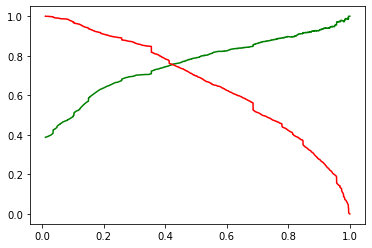

In [115]:
plt.plot(thresholds, p[:-1], "g-")
plt.plot(thresholds, r[:-1], "r-")
plt.show()

### Step 10: Making predictions on the test data

In [116]:
X_test[['TotalVisits','Total Time Spent on Website',
        'Page Views Per Visit']] = scaler.transform(X_test[['TotalVisits',
                                                            'Total Time Spent on Website',
                                                            'Page Views Per Visit']])

In [117]:
X_test = X_test[col]
X_test.head()

,Do Not Email,Total Time Spent on Website,LeadOrigin_Lead Add Form,LeadSource_Olark Chat,LeadSource_Welingak Website,LastActivity_Not Mentioned,LastActivity_Olark Chat Conversation,CurrentOccupation_Not Avaiable,CurrentOccupation_Working Professional,LastNotableActivity_Email Link Clicked,LastNotableActivity_Email Opened,LastNotableActivity_Modified,LastNotableActivity_Olark Chat Conversation,LastNotableActivity_Page Visited on Website
4664,0,-0.884316,0,1,0,0,0,0,0,0,1,0,0,0
5394,0,-0.583371,0,1,0,0,0,1,0,0,0,1,0,0
1595,0,1.264507,0,0,0,0,0,0,1,0,0,1,0,0
2111,0,0.073571,0,0,0,0,0,1,0,0,1,0,0,0
9182,0,-0.884316,0,1,0,0,0,0,0,0,0,1,0,0


In [118]:
X_test_sm = sm.add_constant(X_test)

In [119]:
y_test_pred = res.predict(X_test_sm)

In [120]:
y_test_pred[:10]

4664    0.355272
5394    0.135943
1595    0.907962
2111    0.116577
9182    0.258764
1055    0.473122
541     0.074195
446     0.972897
3728    0.030314
4249    0.005946
dtype: float64

In [121]:
#Converting y_pred to a dataframe which is an array
y_pred_1 = pd.DataFrame(y_test_pred)
y_pred_1.head()

,0
4664,0.355272
5394,0.135943
1595,0.907962
2111,0.116577
9182,0.258764


In [122]:
# Converting y_test to dataframe
y_test_df = pd.DataFrame(y_test)

In [123]:
# Putting LeadId to index

y_test_df['LeadId'] = y_test_df.index

In [124]:
# Removing index for both dataframes to append them side by side 

y_pred_1.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)

In [125]:
# Appending y_test_df and y_pred_1

y_pred_final = pd.concat([y_test_df, y_pred_1],axis=1)

In [126]:
y_pred_final.head()

,Converted,LeadId,0
0,0,4664,0.355272
1,0,5394,0.135943
2,1,1595,0.907962
3,0,2111,0.116577
4,0,9182,0.258764


In [127]:
#Renaming the column 

y_pred_final= y_pred_final.rename(columns={ 0 : 'Converted_Prob'})

In [128]:
y_pred_final.head()

,Converted,LeadId,Converted_Prob
0,0,4664,0.355272
1,0,5394,0.135943
2,1,1595,0.907962
3,0,2111,0.116577
4,0,9182,0.258764


In [129]:
#Rearranging the columns

y_pred_final = y_pred_final[['LeadId','Converted','Converted_Prob']]

In [130]:
y_pred_final.head()

,LeadId,Converted,Converted_Prob
0,4664,0,0.355272
1,5394,0,0.135943
2,1595,1,0.907962
3,2111,0,0.116577
4,9182,0,0.258764


In [131]:
# Based on cut off threshold using accuracy, sensitivity and specificity of 0.37

y_pred_final['final_predicted'] = y_pred_final.Converted_Prob.map(lambda x: 1 if x > 0.37 else 0)

In [132]:
y_pred_final.head()

,LeadId,Converted,Converted_Prob,final_predicted
0,4664,0,0.355272,0
1,5394,0,0.135943,0
2,1595,1,0.907962,1
3,2111,0,0.116577,0
4,9182,0,0.258764,0


In [133]:
# Now let us calculate the lead score

y_pred_final['lead_score'] = y_pred_final.Converted_Prob.map(lambda x: round(x*100))
y_pred_final.head(20)

,LeadId,Converted,Converted_Prob,final_predicted,lead_score
0,4664,0,0.355272,0,36
1,5394,0,0.135943,0,14
2,1595,1,0.907962,1,91
3,2111,0,0.116577,0,12
4,9182,0,0.258764,0,26
5,1055,1,0.473122,1,47
6,541,0,0.074195,0,7
7,446,1,0.972897,1,97
8,3728,0,0.030314,0,3
9,4249,0,0.005946,0,1


In [134]:
# checking if 80% cases are correctly predicted based on the converted column.

check_test_df = y_pred_final.loc[y_pred_final['Converted']==1,['Converted','final_predicted']]
check_test_df['final_predicted'].value_counts(normalize=True)*100

1    81.238274
0    18.761726
Name: final_predicted, dtype: float64

##### Here, the final prediction of conversions is about 81% (>80% target), which is same as the training data, making it a good model.

#### Checking the overall metrics on test data

In [135]:
#Accuracy

metrics.accuracy_score(y_pred_final.Converted, y_pred_final.final_predicted)

0.8106312292358804

In [136]:
confusion3 = metrics.confusion_matrix(y_pred_final.Converted, y_pred_final.final_predicted )
confusion3

array([[1330,  313],
       [ 200,  866]])

In [137]:
TP = confusion3[1,1] # true positive 
TN = confusion3[0,0] # true negatives
FP = confusion3[0,1] # false positives
FN = confusion3[1,0] # false negatives

In [138]:
print('Sensitivity:', TP / float(TP+FN))
print('Specificity:', TN / float(TN+FP))
print('False Positive Rate:', FP / float(TN+FP))
print('Positive predictive value:', TP / float(TP+FP))
print('Negative predictive value:', TN / float(TN+ FN))

Sensitivity: 0.8123827392120075
Specificity: 0.8094948265368229
False Positive Rate: 0.1905051734631771
Positive predictive value: 0.734520780322307
Negative predictive value: 0.869281045751634


#### Precision and Recall metrics for the test set

In [139]:
print('Precision: ',precision_score(y_pred_final.Converted, y_pred_final.final_predicted))
print('Recall: ',recall_score(y_pred_final.Converted, y_pred_final.final_predicted))

Precision:  0.734520780322307
Recall:  0.8123827392120075


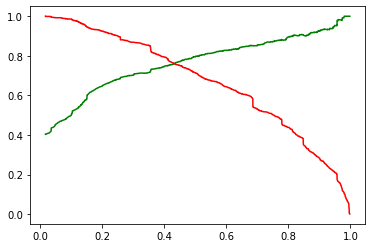

In [140]:
p, r, thresholds = precision_recall_curve(y_pred_final.Converted, y_pred_final.Converted_Prob)

plt.plot(thresholds, p[:-1], "g-")
plt.plot(thresholds, r[:-1], "r-")
plt.show()

### Conclusion

#### As per the final Model (logm3):
- Accuracy, Sensitivity & Specificity of the train and test set are around 81%, indicating that the model is a good predictor of the potential leads.
- The lead score calulated in the train set has a lead conversion rate of about 81%, which satisfies the target set by the CEO.
- The optimal cut-off based on Sensitivity-Specificity is 0.37 and based on Precision-Recall is 0.41, indicating that the model is stable.